In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Resources/ML_Ready_Data/total_crime_adhoc_10k.csv")

In [3]:
from scipy import stats
def normality_clean(df, z, col):
    #check if col parameter is priovided
    if col != None:
        df = df.loc[df[col] > 0]
        print("FYI, this is gonna drop dummies with 0 values")
    #drop all n_bound outliers
    df = df[(np.abs(stats.zscore(df)) < z).all(axis=1)]
    return df

In [4]:
df_norm = normality_clean(df, 3, "total_crime_10k")

FYI, this is gonna drop dummies with 0 values


In [5]:
def prep_X_y(df, y_col):
    X = df.drop([y_col, "fips_state_county_code"], axis=1)
    y = df[y_col]
    return X, y

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
def random_forest_regressor(dataset, y_val):
    X, y = prep_X_y(dataset, y_val)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    reg = RandomForestRegressor(n_estimators=250, max_leaf_nodes=100, random_state=42)
    reg.fit(X_train, y_train)
    print(f'train: {reg.score(X_train, y_train)} test: {reg.score(X_test, y_test)}')
    plt.scatter(y_train, reg.predict(X_train), color='blue')
    plt.scatter(y_test, reg.predict(X_test), color='red')
    plt.show()
    print("--------------------")

train: 0.714085846720071 test: 0.2770817047893904


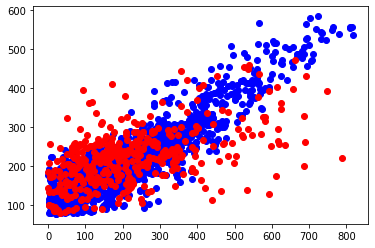

--------------------


In [16]:
random_forest_regressor(df_norm, "total_crime_10k")

In [8]:
X, y = prep_X_y(df_norm, "total_crime_10k")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
for i in range (100, 250, 10):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    reg = RandomForestRegressor(n_estimators=i, max_leaf_nodes=100, random_state=42)
    reg.fit(X_train, y_train)
    print(f'For {i} estimators:::: train: {reg.score(X_train, y_train)} test: {reg.score(X_test, y_test)}')
    # plt.scatter(y_train, reg.predict(X_train), color='blue')
    # plt.show()
    print("--------------------")

For 100 estimators:::: train: 0.7107438720932759 test: 0.273443919982187
--------------------
For 110 estimators:::: train: 0.7117394419221834 test: 0.2737278588237956
--------------------
For 120 estimators:::: train: 0.7111865934497239 test: 0.27310641738811736
--------------------
For 130 estimators:::: train: 0.7110932186871711 test: 0.27235208110994147
--------------------
For 140 estimators:::: train: 0.711529273469689 test: 0.27253038698242504
--------------------
For 150 estimators:::: train: 0.71197556136754 test: 0.2727761059669076
--------------------
For 160 estimators:::: train: 0.7119456408717484 test: 0.27382571966676905
--------------------
For 170 estimators:::: train: 0.7123893595365753 test: 0.2735957522442508
--------------------
For 180 estimators:::: train: 0.7127619695999527 test: 0.27378080112339154
--------------------
For 190 estimators:::: train: 0.7130986382793311 test: 0.27492252946024553
--------------------
For 200 estimators:::: train: 0.7136747998578918